In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [9]:
df = pd.read_csv("Social_Network_Ads.csv")

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
display(df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [13]:
df.shape

(400, 5)

In [18]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [15]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


# Eksik Değer Analizi

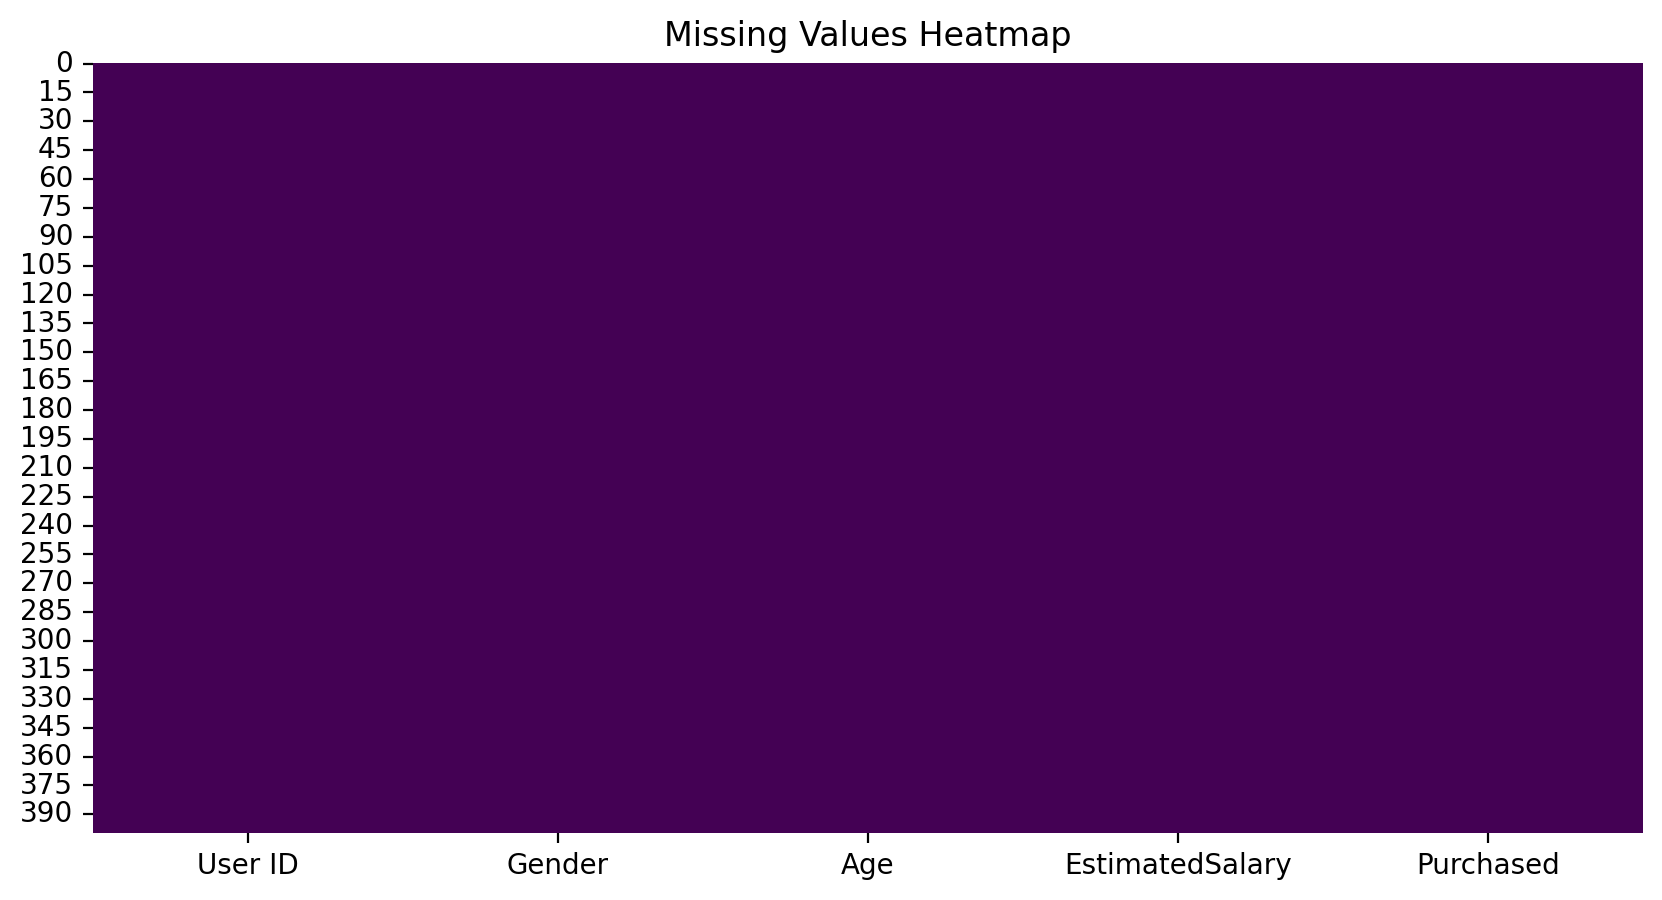

In [17]:
df.isnull().sum()
df.isnull().mean()*100
plt.figure(figsize=(10,5), dpi=200)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Sayısal Değişkenlerin İncelenmesi

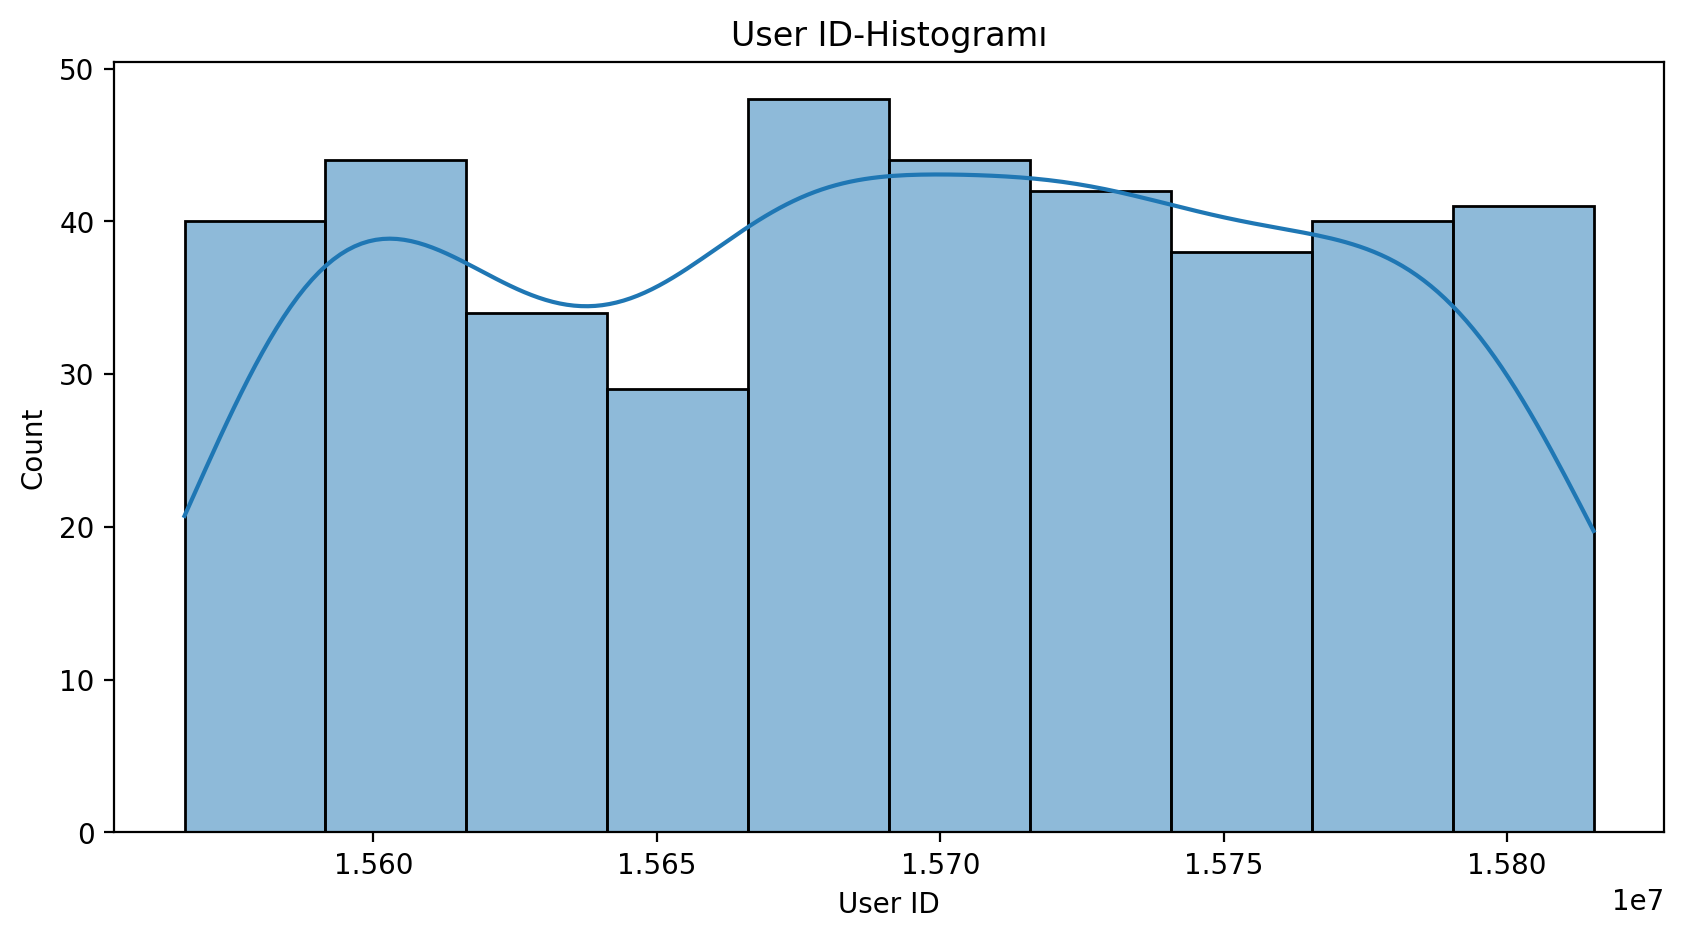

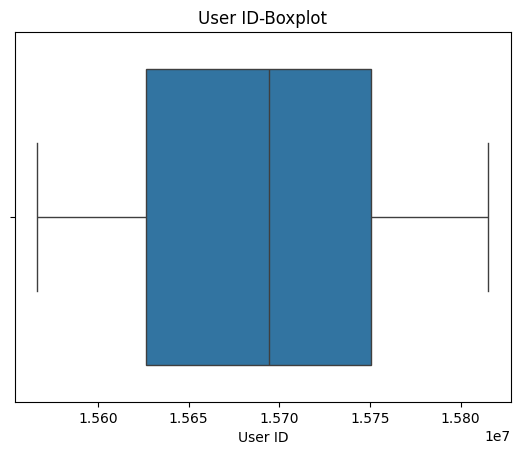

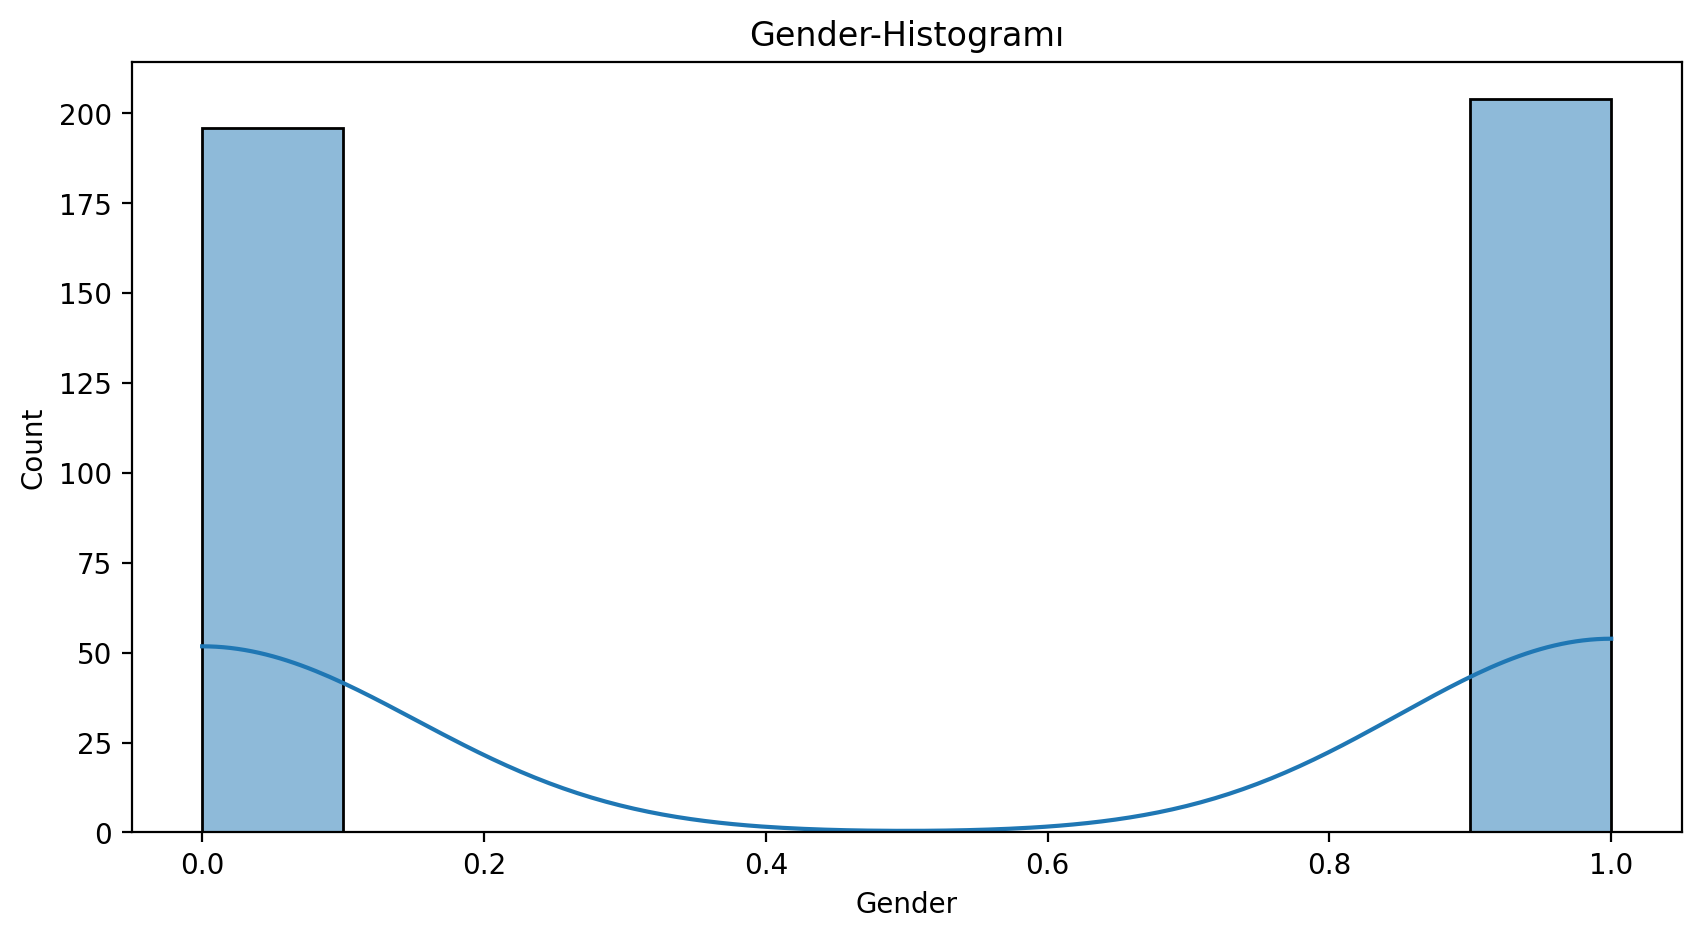

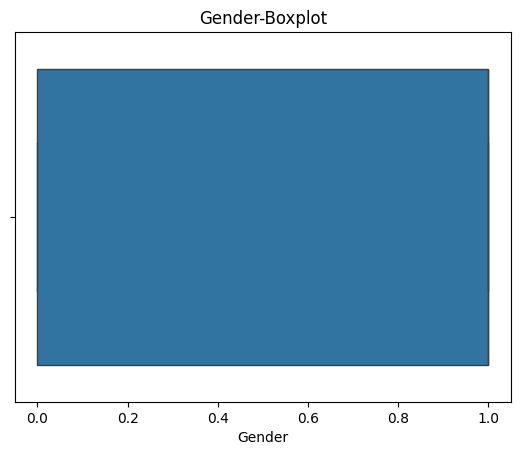

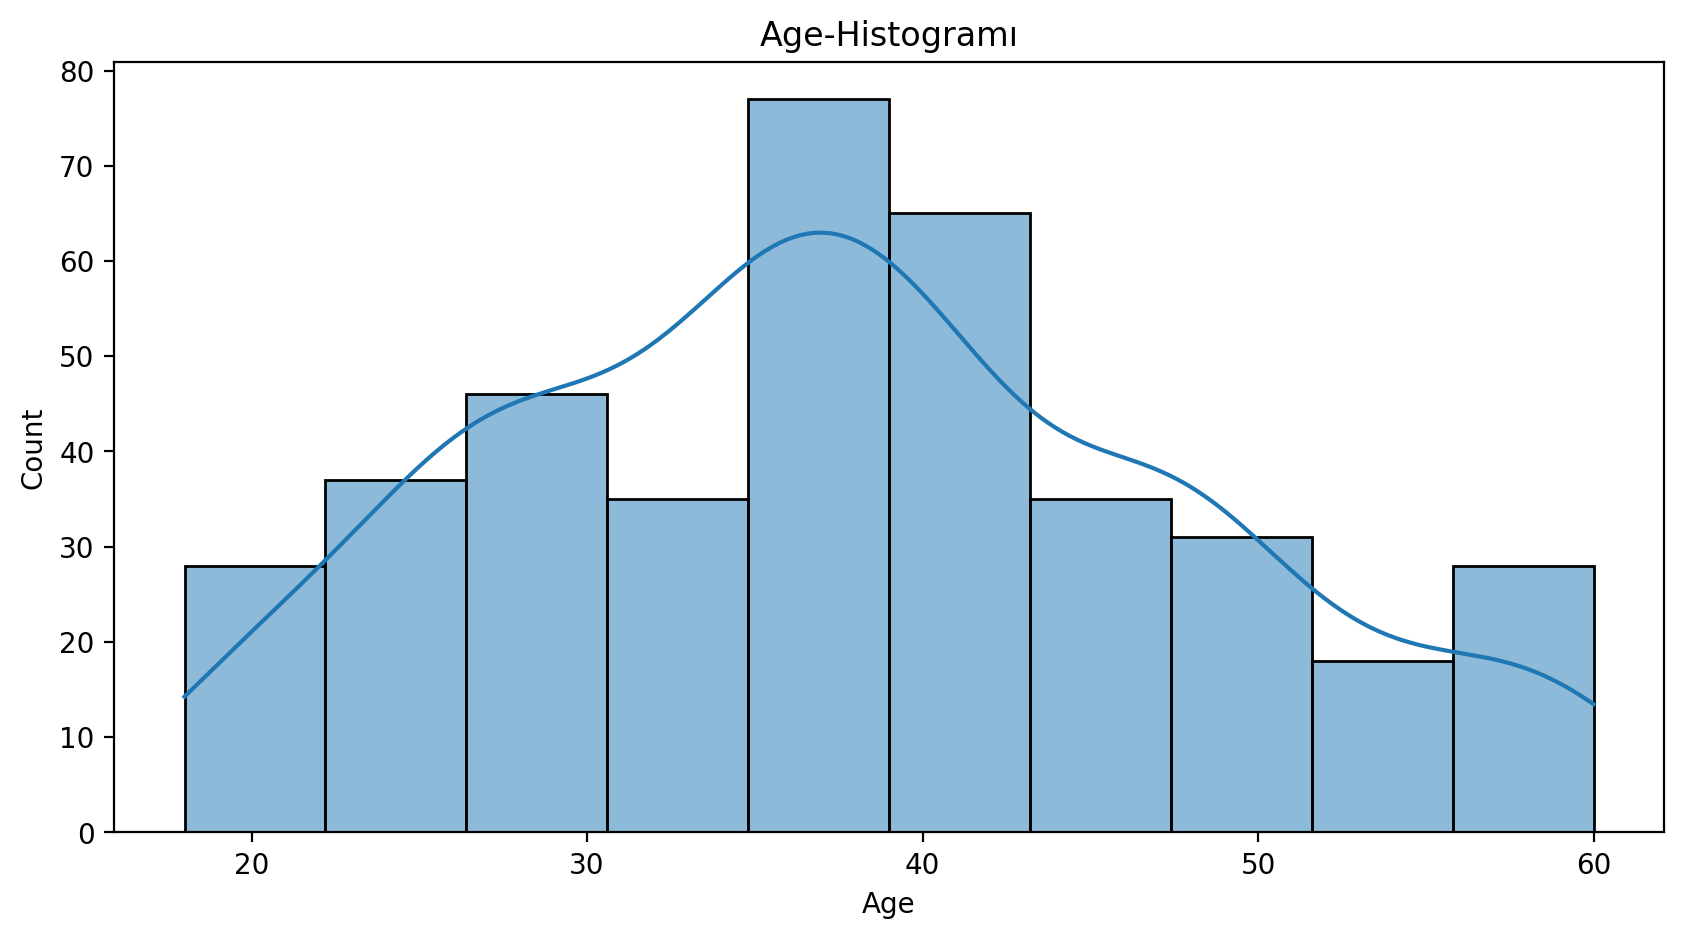

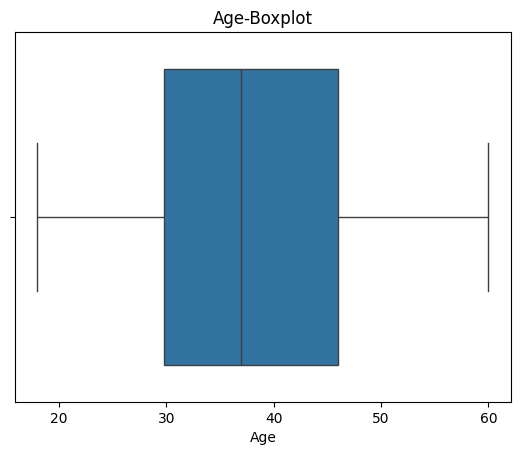

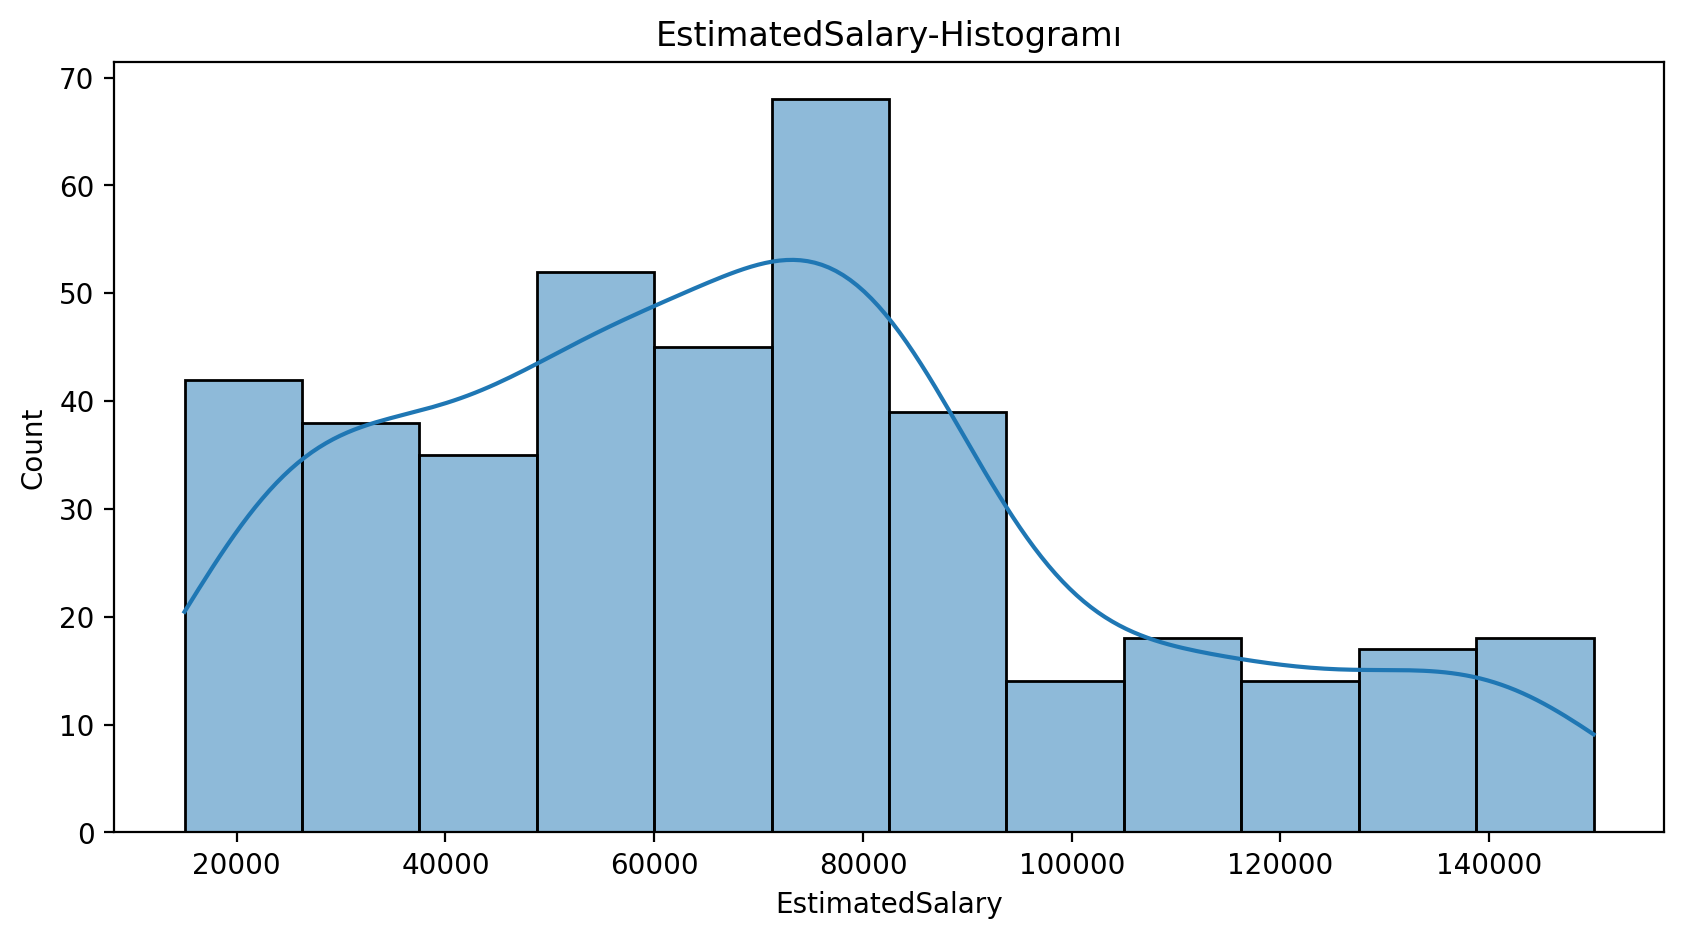

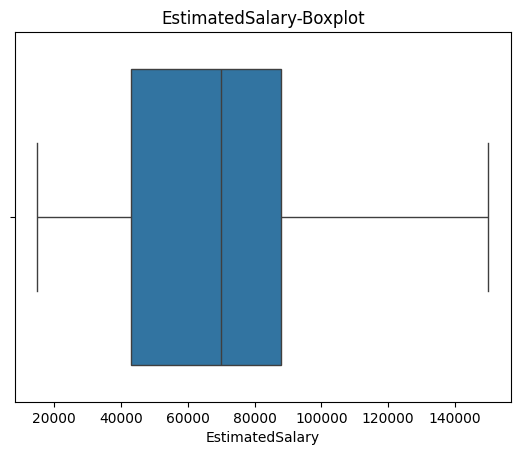

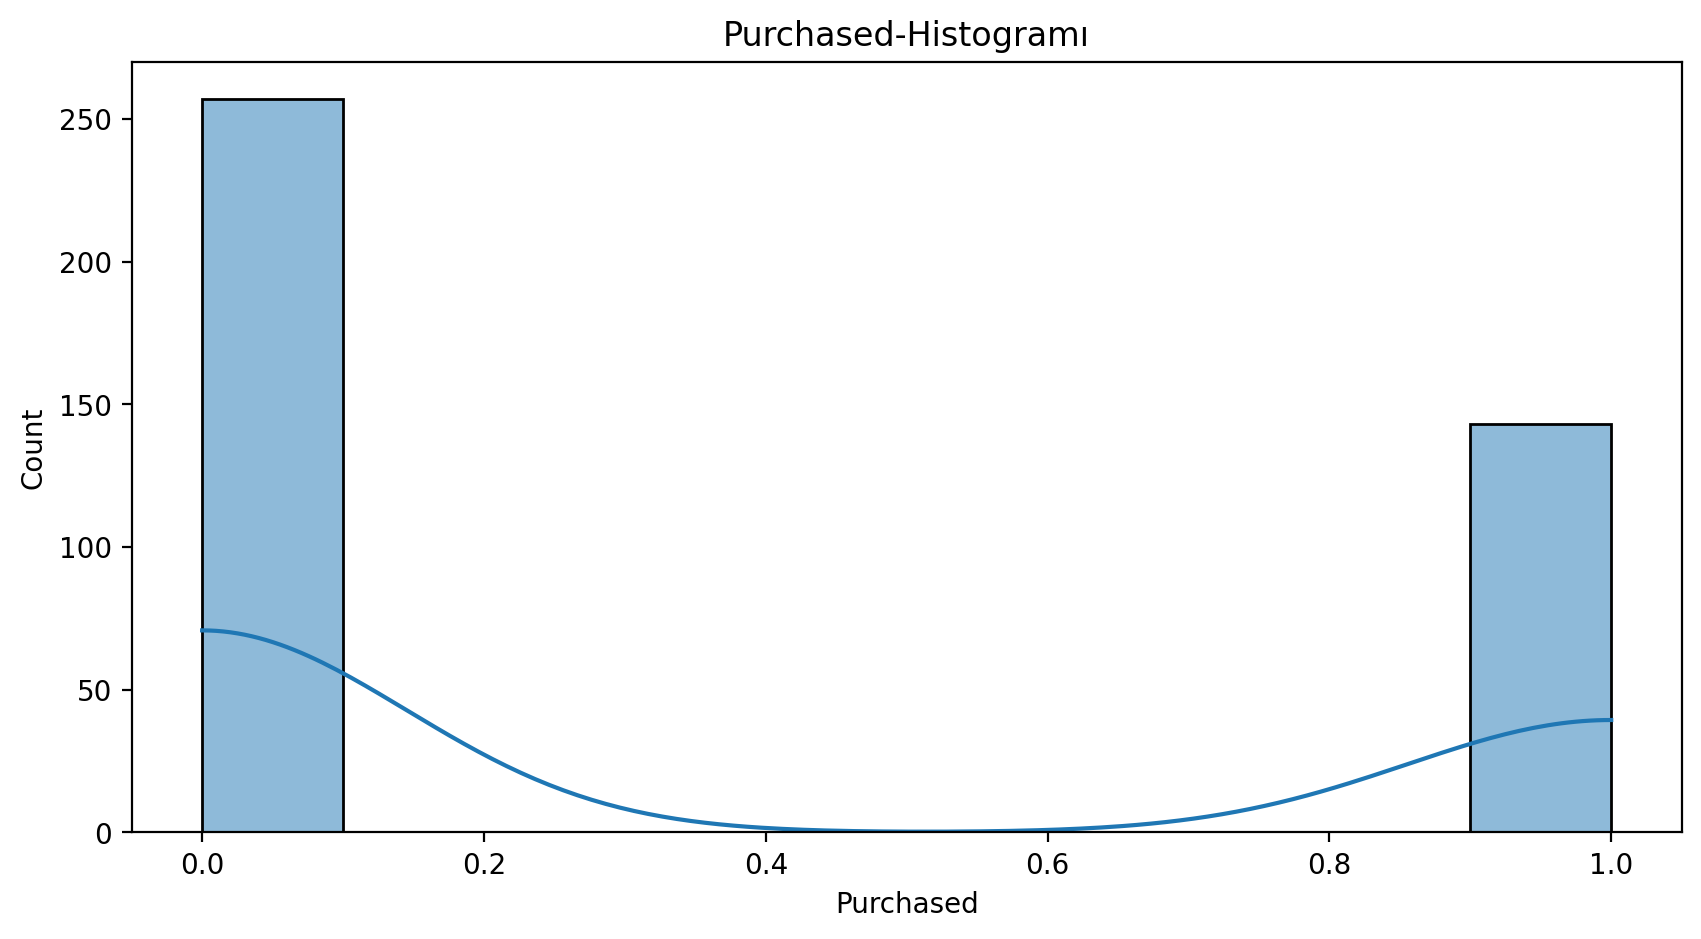

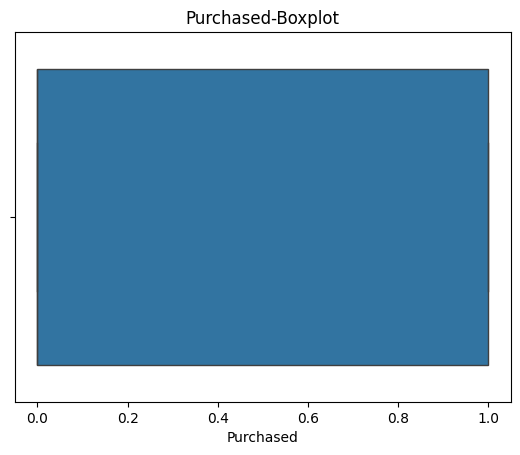

In [19]:
for col in df:
  plt.figure(figsize=(10,5), dpi=200)
  sns.histplot(df[col], kde=True)
  plt.title(f"{col}-Histogramı")
  plt.show()

  sns.boxplot(x =df[col])
  plt.title(f"{col}-Boxplot")
  plt.show()

# Aykırı Değer Analizi

In [20]:
def aykiri_deger_tespiti(df,column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower = q1-1.5*iqr
  upper = q3 +1.5*iqr
  outliers = df[(df[column] <lower) |(df[column] > upper)]
  return outliers

for col in df.columns:
  outliers = aykiri_deger_tespiti(df,col)
  print(f"{col} için aykırı değerler : {outliers.shape[0]}")



User ID için aykırı değerler : 0
Gender için aykırı değerler : 0
Age için aykırı değerler : 0
EstimatedSalary için aykırı değerler : 0
Purchased için aykırı değerler : 0


# Korelasyon Analizi

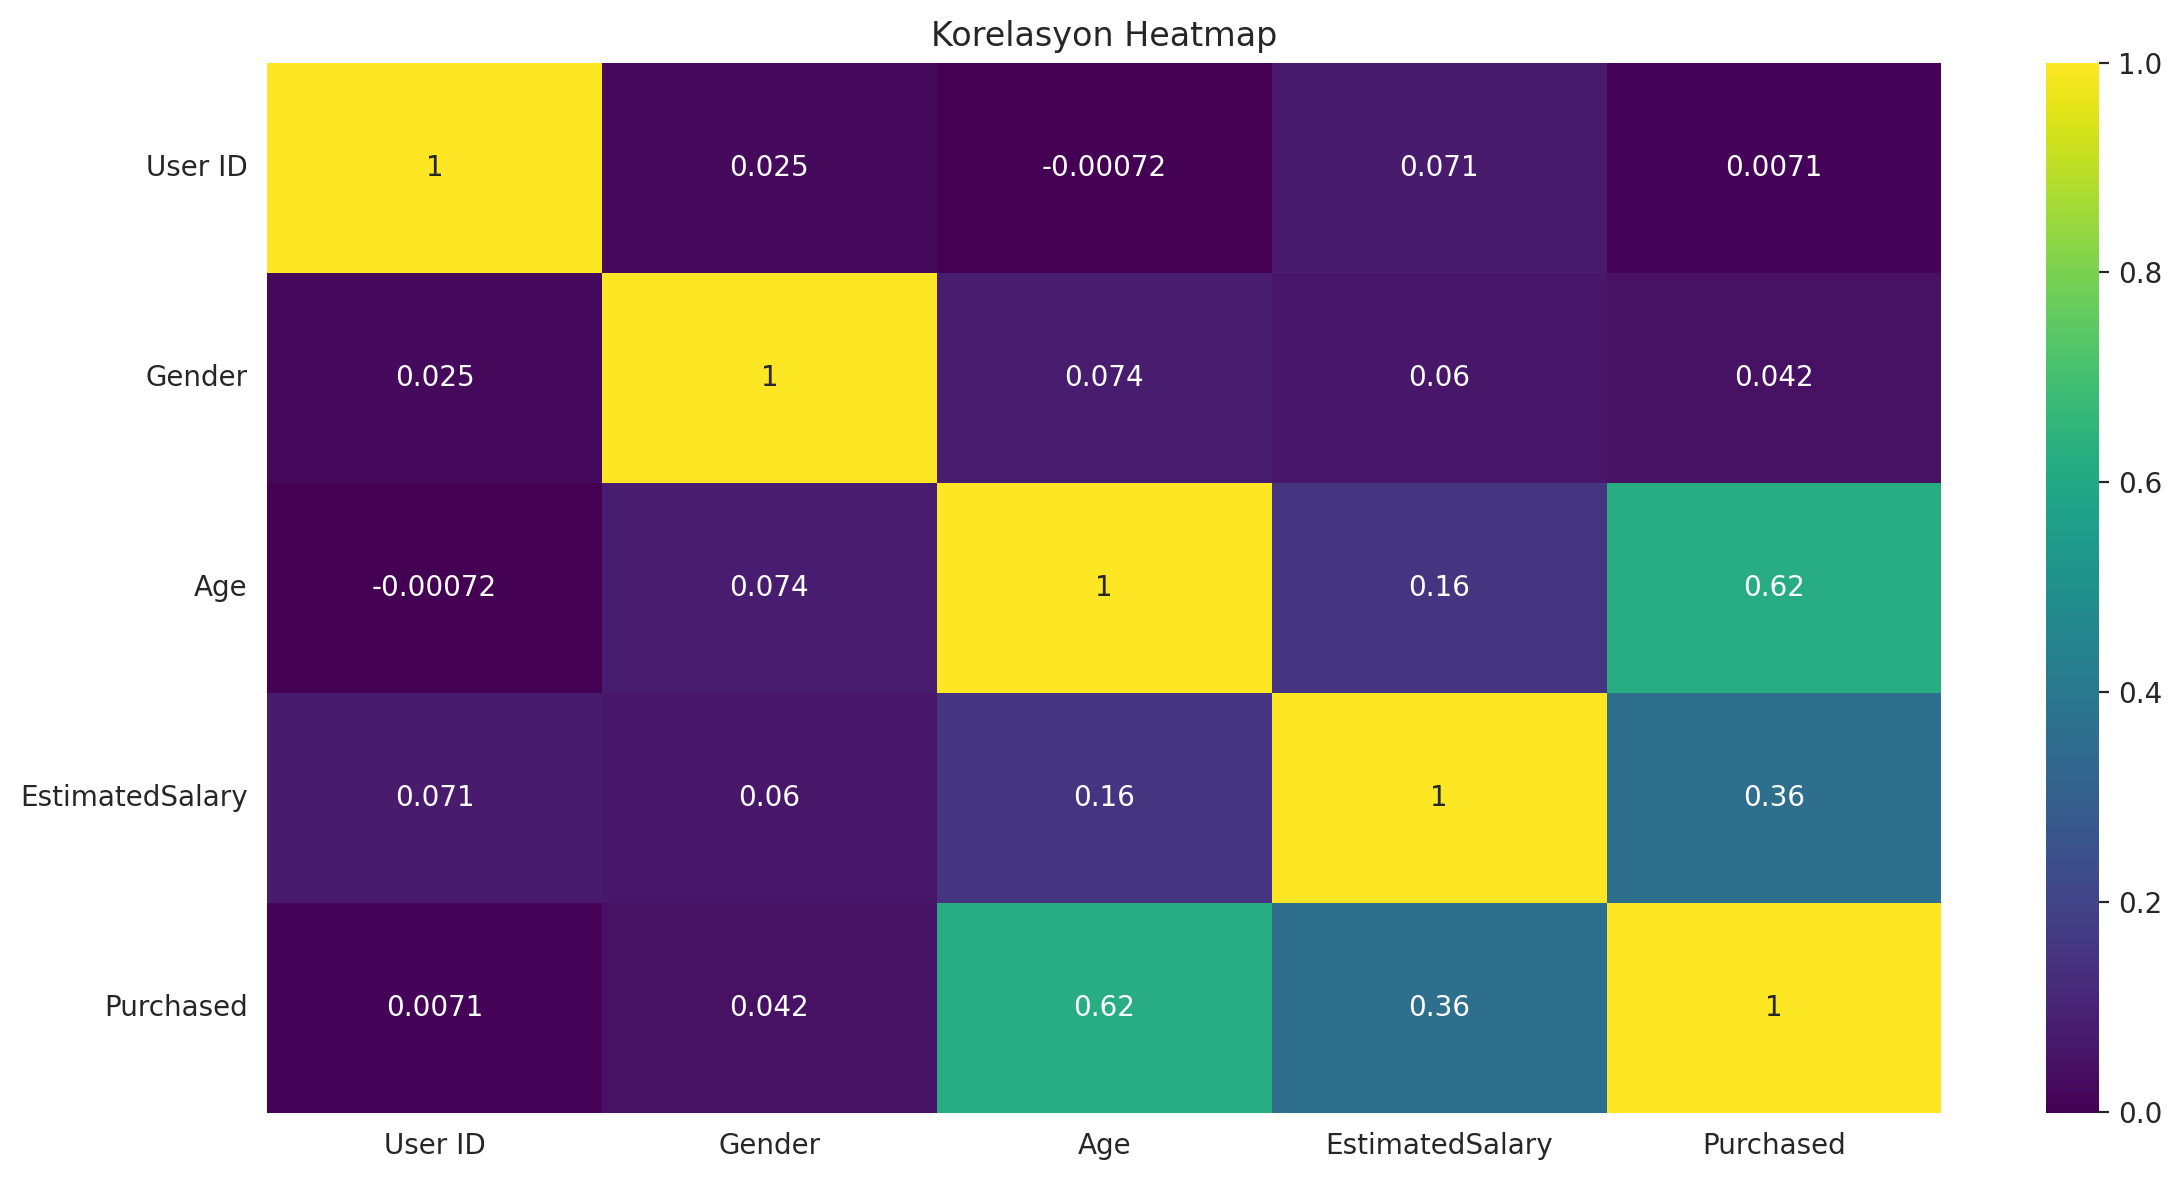

In [21]:
sns.set_style("white")
sns.set_palette("viridis")
plt.figure(figsize=(12,6), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Korelasyon Heatmap")
plt.tight_layout()
plt.show()


# Hedef Değişken İle İlişkiler

In [22]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

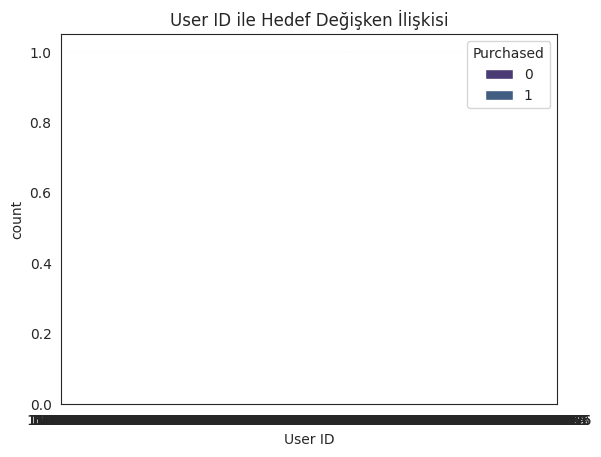

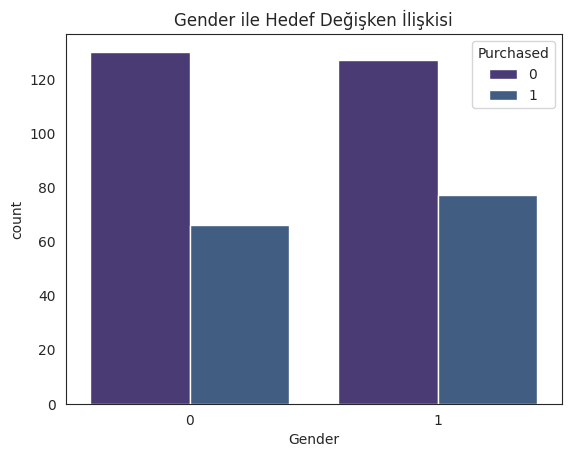

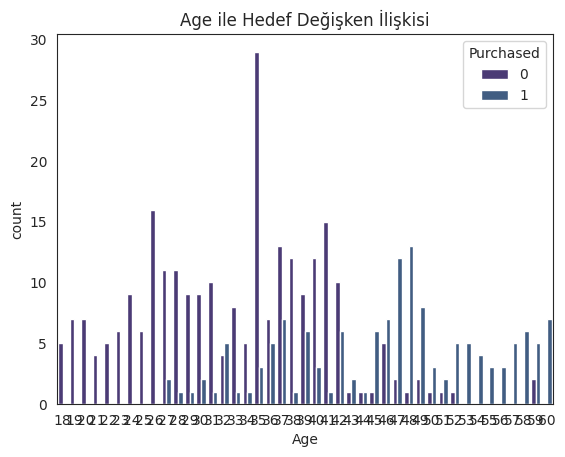

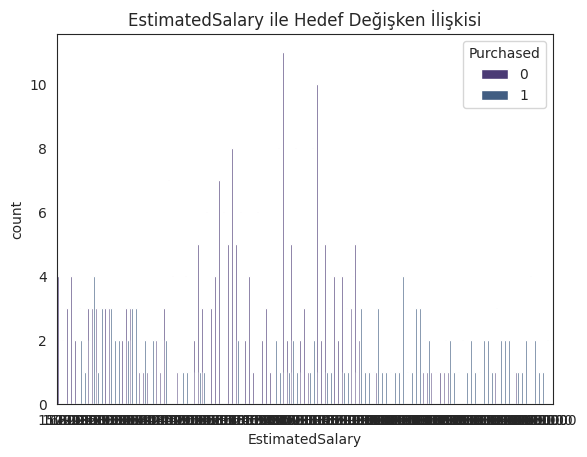

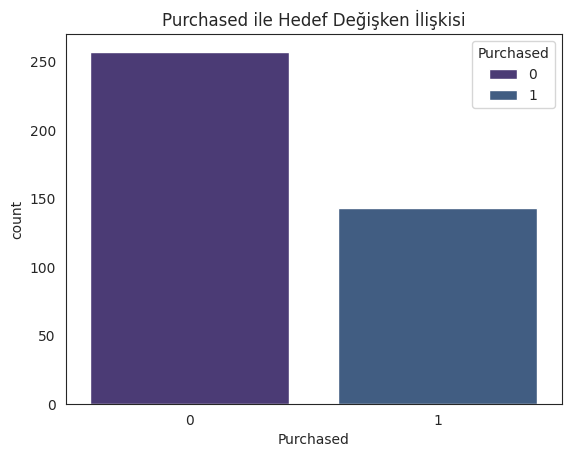

In [23]:
for col in df:
  sns.countplot(data=df, x=col, hue='Purchased')
  plt.title(f"{col} ile Hedef Değişken İlişkisi")
  plt.xticks(rotation=0)
  plt.show()

# **Train Test Split**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [27]:
logic = LogisticRegression(class_weight='balanced',max_iter=1000)
logic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

# Tahmin Ve Metrikler

In [28]:
y_pred_logic = logic.predict(X_test)

print("Accuracy Score Logic", accuracy_score(y_test,y_pred_logic))
print("Confusion Matrix Logic", confusion_matrix(y_test,y_pred_logic))
print("Classification Report Logic", classification_report(y_test,y_pred_logic))

Accuracy Score Logic 0.8875
Confusion Matrix Logic [[47  5]
 [ 4 24]]
Classification Report Logic               precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



# GridSearchCV

In [30]:
penalty = ["l1","l2","elasticnet"]
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ["lbfgs", "newton-cg", "liblinear", "sag", "saga"]
class_weight = [{w:0,y:1} for w in [1,10,50,100] for y in [1,10,50,100] ]

params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

model_grid = LogisticRegression(max_iter=1000)

grid_params = GridSearchCV(
    estimator=model_grid,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)

grid_params.fit(X_train, y_train)

print("En İyi Parametreler:", grid_params.best_params_)
print("En İyi Doğruluk Skoru:", grid_params.best_score_)

En İyi Parametreler: {'C': 0.1, 'class_weight': {1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
En İyi Doğruluk Skoru: 0.828125


In [31]:
y_pred_grid = grid_params.predict(X_test)

print("Accuracy Score Grid", accuracy_score(y_test,y_pred_grid))
print("Confusion Matrix Grid", confusion_matrix(y_test,y_pred_grid))
print("Classification Report Grid", classification_report(y_test,y_pred_grid))

Accuracy Score Grid 0.8875
Confusion Matrix Grid [[50  2]
 [ 7 21]]
Classification Report Grid               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



# ROC AUC

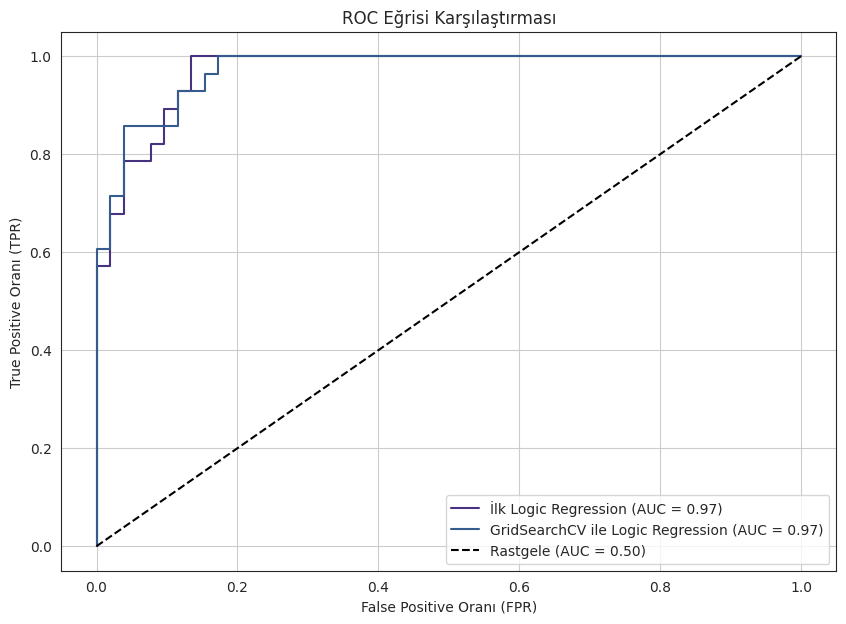

İlk Logistic Regression AUC Skoru: 0.9705
GridSearchCV ile Logistic Regression AUC Skoru: 0.9725


In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_logic = logic.predict_proba(X_test)[:, 1]
auc_logic = roc_auc_score(y_test, y_pred_proba_logic)
fpr_logic, tpr_logic, _ = roc_curve(y_test, y_pred_proba_logic)

y_pred_proba_best_grid = grid_params.best_estimator_.predict_proba(X_test)[:, 1]
auc_best_grid = roc_auc_score(y_test, y_pred_proba_best_grid)
fpr_best_grid, tpr_best_grid, _ = roc_curve(y_test, y_pred_proba_best_grid)

plt.figure(figsize=(10, 7))
plt.plot(fpr_logic, tpr_logic, label=f'İlk Logic Regression (AUC = {auc_logic:.2f})')
plt.plot(fpr_best_grid, tpr_best_grid, label=f'GridSearchCV ile Logic Regression (AUC = {auc_best_grid:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele (AUC = 0.50)')
plt.xlabel('False Positive Oranı (FPR)')
plt.ylabel('True Positive Oranı (TPR)')
plt.title('ROC Eğrisi Karşılaştırması')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"İlk Logistic Regression AUC Skoru: {auc_logic:.4f}")
print(f"GridSearchCV ile Logistic Regression AUC Skoru: {auc_best_grid:.4f}")

# SMOTE ile Oversampling Uygulama

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Orijinal eğitim verisi boyutu:", X_train.shape)
print("SMOTE uygulanmış eğitim verisi boyutu:", X_train_smote.shape)
print("Orijinal eğitim hedef değişken dağılımı:\n", y_train.value_counts())
print("SMOTE uygulanmış eğitim hedef değişken dağılımı:\n", y_train_smote.value_counts())

Orijinal eğitim verisi boyutu: (320, 4)
SMOTE uygulanmış eğitim verisi boyutu: (410, 4)
Orijinal eğitim hedef değişken dağılımı:
 Purchased
0    205
1    115
Name: count, dtype: int64
SMOTE uygulanmış eğitim hedef değişken dağılımı:
 Purchased
0    205
1    205
Name: count, dtype: int64


SMOTE Uygulanmış Modelin Doğruluk Skoru: 0.8875

SMOTE Uygulanmış Modelin Karmaşıklık Matrisi:
 [[47  5]
 [ 4 24]]

SMOTE Uygulanmış Modelin Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



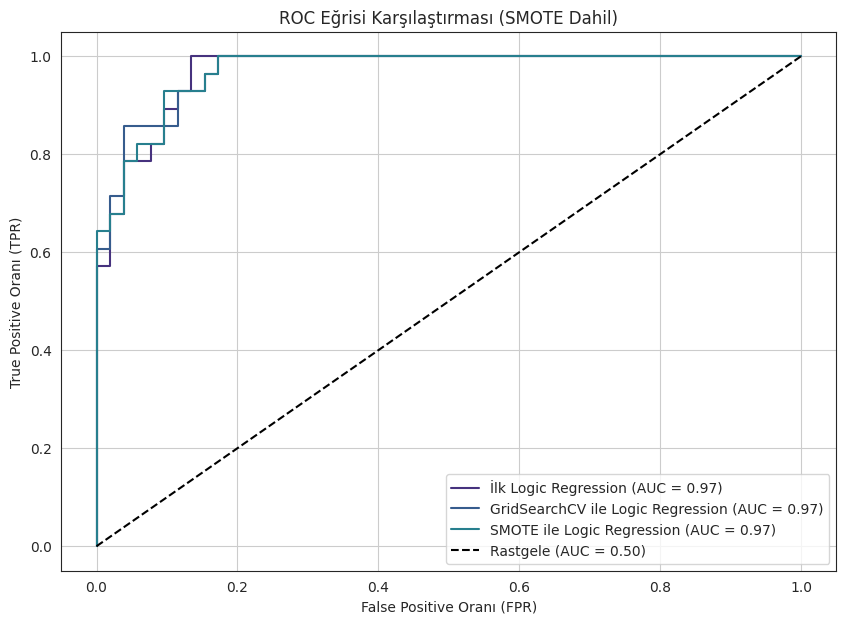

SMOTE Uygulanmış Logistic Regression AUC Skoru: 0.9712


In [43]:
logic_smote = LogisticRegression(max_iter=1000)
logic_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = logic_smote.predict(X_test)

print("SMOTE Uygulanmış Modelin Doğruluk Skoru:", accuracy_score(y_test, y_pred_smote))
print("\nSMOTE Uygulanmış Modelin Karmaşıklık Matrisi:\n", confusion_matrix(y_test, y_pred_smote))
print("\nSMOTE Uygulanmış Modelin Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_smote))

y_pred_proba_smote = logic_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_proba_smote)

plt.figure(figsize=(10, 7))
plt.plot(fpr_logic, tpr_logic, label=f'İlk Logic Regression (AUC = {auc_logic:.2f})')
plt.plot(fpr_best_grid, tpr_best_grid, label=f'GridSearchCV ile Logic Regression (AUC = {auc_best_grid:.2f})')
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE ile Logic Regression (AUC = {auc_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele (AUC = 0.50)')
plt.xlabel('False Positive Oranı (FPR)')
plt.ylabel('True Positive Oranı (TPR)')
plt.title('ROC Eğrisi Karşılaştırması (SMOTE Dahil)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"SMOTE Uygulanmış Logistic Regression AUC Skoru: {auc_smote:.4f}")

# Model Performanslarının Karşılaştırılması

In [45]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)', 'AUC'])

report_logic = classification_report(y_test, y_pred_logic, output_dict=True)
results.loc[0] = ['İlk Logic Regression',
                  accuracy_score(y_test, y_pred_logic),
                  report_logic['1']['precision'],
                  report_logic['1']['recall'],
                  report_logic['1']['f1-score'],
                  auc_logic]

report_grid = classification_report(y_test, y_pred_grid, output_dict=True)
results.loc[1] = ['GridSearchCV ile Logic Regression',
                  accuracy_score(y_test, y_pred_grid),
                  report_grid['1']['precision'],
                  report_grid['1']['recall'],
                  report_grid['1']['f1-score'],
                  auc_best_grid]

report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
results.loc[2] = ['SMOTE ile Logic Regression',
                  accuracy_score(y_test, y_pred_smote),
                  report_smote['1']['precision'],
                  report_smote['1']['recall'],
                  report_smote['1']['f1-score'],
                  auc_smote]

print("Model Karşılaştırma Tablosu:")
display(results)

print("\nROC Eğrisi Karşılaştırması:")
print("Lütfen yukarıdaki ROC Eğrisi Karşılaştırması grafiğine bakın.")

Model Karşılaştırma Tablosu:


,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-score (Class 1),AUC
0,İlk Logic Regression,0.8875,0.827586,0.857143,0.842105,0.970467
1,GridSearchCV ile Logic Regression,0.8875,0.913043,0.750000,0.823529,0.972527
2,SMOTE ile Logic Regression,0.8875,0.827586,0.857143,0.842105,0.971154



ROC Eğrisi Karşılaştırması:
Lütfen yukarıdaki ROC Eğrisi Karşılaştırması grafiğine bakın.
